In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [21]:
df = pd.read_csv('UK_Accident.csv')


In [22]:
print(df.head()) 

   Unnamed: 0 Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0           0  200501BS00001               525680.0                178240.0   
1           1  200501BS00002               524170.0                181650.0   
2           2  200501BS00003               524520.0                182240.0   
3           3  200501BS00004               526900.0                177530.0   
4           4  200501BS00005               528060.0                179040.0   

   Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  -0.191170  51.489096             1                  2                   1   
1  -0.211708  51.520075             1                  3                   1   
2  -0.206458  51.525301             1                  3                   2   
3  -0.173862  51.482442             1                  3                   1   
4  -0.156618  51.495752             1                  3                   1   

   Number_of_Casualties  ...      Pedestrian

In [6]:
df.info()        # Column types & non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153399 entries, 0 to 1153398
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1153399 non-null  int64  
 1   Accident_Index                               1153399 non-null  object 
 2   Location_Easting_OSGR                        1153298 non-null  float64
 3   Location_Northing_OSGR                       1153399 non-null  float64
 4   Longitude                                    1153298 non-null  float64
 5   Latitude                                     1153399 non-null  float64
 6   Police_Force                                 1153399 non-null  int64  
 7   Accident_Severity                            1153399 non-null  int64  
 8   Number_of_Vehicles                           1153399 non-null  int64  
 9   Number_of_Casualties                         1

In [5]:
df.describe()    # Summary stats for numeric columns

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.153399e+06,1.153298e+06,1.153399e+06,1.153298e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153398e+06,1.153398e+06,1.153398e+06,1.153398e+06,1.153398e+06
mean,2.420112e+05,4.382640e+05,3.045864e+05,-1.455614e+00,5.262524e+01,2.886476e+01,2.839710e+00,1.831974e+00,1.357065e+00,4.122711e+00,3.342295e+02,4.089557e+00,1.012804e+03,3.901835e+01,2.671739e+00,3.853971e+02,1.349152e+00,2.008196e+03
std,1.589974e+05,9.330730e+04,1.588135e+05,1.371565e+00,1.512469e+00,2.525770e+01,4.014456e-01,7.142002e-01,8.244038e-01,1.926382e+00,2.568984e+02,1.430178e+00,1.835207e+03,1.412118e+01,3.202804e+00,1.309525e+03,4.769423e-01,2.401290e+00
min,0.000000e+00,6.495000e+04,0.000000e+00,-7.516225e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,9.611600e+04,3.755500e+05,1.796600e+05,-2.367335e+00,5.150325e+01,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.060000e+02,3.000000e+00,0.000000e+00,3.000000e+01,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,2.313760e+05,4.369800e+05,2.823900e+05,-1.444703e+00,5.243539e+01,2.200000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.000000e+02,4.000000e+00,1.250000e+02,3.000000e+01,3.000000e+00,0.000000e+00,1.000000e+00,2.009000e+03
75%,3.755510e+05,5.214300e+05,4.009760e+05,-2.421147e-01,5.350375e+01,4.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.100000e+02,6.000000e+00,7.020000e+02,5.000000e+01,6.000000e+00,0.000000e+00,2.000000e+00,2.010000e+03
max,5.700100e+05,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,3.400000e+01,8.700000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,6.000000e+00,9.999000e+03,3.000000e+00,2.012000e+03


In [7]:
df.shape  # we have 33 columns

(1153399, 33)

In [10]:
df.columns  # name of the columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [11]:
# LETS FIND THE MISSING VALUES
df.isnull().sum() 

Unnamed: 0                                           0
Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                               0
Longitude                                          101
Latitude                                             0
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               104
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limi

In [8]:
df.describe(include='all')  # ANALYZE BOTH NUMERIC AND CATEGORICAL

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
count,1.153399e+06,1153399,1.153298e+06,1.153399e+06,1.153298e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,...,1153364,1153398,1153398,1153398,28521,20934,1.153398e+06,1153398,1073878,1.153398e+06
unique,NaN,722311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,5,9,6,7,5,NaN,2,34248,NaN
top,NaN,2.01E+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,Other object in carriageway,NaN,Yes,E01000004,NaN
freq,NaN,235965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,965005,843715,921957,793149,13534,9224,NaN,931920,2074,NaN
mean,2.420112e+05,NaN,4.382640e+05,3.045864e+05,-1.455614e+00,5.262524e+01,2.886476e+01,2.839710e+00,1.831974e+00,1.357065e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,1.349152e+00,NaN,NaN,2.008196e+03
std,1.589974e+05,NaN,9.330730e+04,1.588135e+05,1.371565e+00,1.512469e+00,2.525770e+01,4.014456e-01,7.142002e-01,8.244038e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,4.769423e-01,NaN,NaN,2.401290e+00
min,0.000000e+00,NaN,6.495000e+04,0.000000e+00,-7.516225e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,2.005000e+03
25%,9.611600e+04,NaN,3.755500e+05,1.796600e+05,-2.367335e+00,5.150325e+01,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,2.006000e+03
50%,2.313760e+05,NaN,4.369800e+05,2.823900e+05,-1.444703e+00,5.243539e+01,2.200000e+01,3.000000e+00,2.000000e+00,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,2.009000e+03
75%,3.755510e+05,NaN,5.214300e+05,4.009760e+05,-2.421147e-01,5.350375e+01,4.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,2.010000e+03


In [9]:
#Junction_Control: 462,022 missing
#Special_Conditions_at_Site: 1,124,878 missing
#Carriageway_Hazards: 1,132,465 missing
# WE CAN DROP THEM THIS 3 COLUMN HAS TOO MANY MISSING VALUES AND DOES NOT EFFECT ON OUR DATASET.

In [10]:
df = df.drop(columns=['Special_Conditions_at_Site', 'Carriageway_Hazards', 'Junction_Control'])


In [11]:
#Filling missing values for numeric columns with median ( we can also fill it with mean )
numeric_cols = ['Location_Easting_OSGR', 'Longitude', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


In [12]:
#Filling missing values for categorical columns with mode
categorical_cols = [
    'Time', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
    'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
    'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Year', 'LSOA_of_Accident_Location']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Week_Name'] = df['Date'].dt.day_name()  # Convert to datetime so ml can process properly

In [14]:
df = df.dropna(subset=['Date'])
df.reset_index(drop=True, inplace=True)

In [15]:
#Unnamed: 0 looks like an index so we can be drop it.
df = df.drop(index=0).reset_index(drop=True)


In [16]:
# Lets Check cleaned data
print("Dataset shape after cleaning:", df.shape)
print(df.isnull().sum())
print(df.head())

Dataset shape after cleaning: (458142, 32)
Unnamed: 0                                     0
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class            

In [ ]:
#Machine learning models cannot directly handle categorical (string) data 
#like "Dry", "Wet", "Fog", "Daylight", "Darkness", etc. They only work with numbers.
#(So Label Encoding is necessary) 

cat_features = ['Road_Type', 'Light_Conditions', 'Weather_Conditions', 
                'Road_Surface_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident', 
                'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities']
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

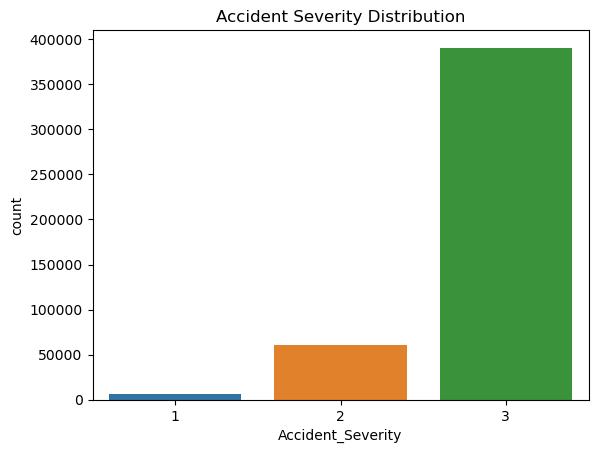

In [20]:
# Accident severity distribution
sns.countplot(x='Accident_Severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()

In [ ]:
#The data indicates that most road accidents are minor, with only a small percentage 
#resulting in serious or fatal outcomes.

#This trend is common in real-world datasets, where low-severity collisions 
#(e.g., fender-benders or light impacts) occur far more often than catastrophic ones.

#It may also suggest that safety measures and emergency responses have been effective in reducing fatalities.

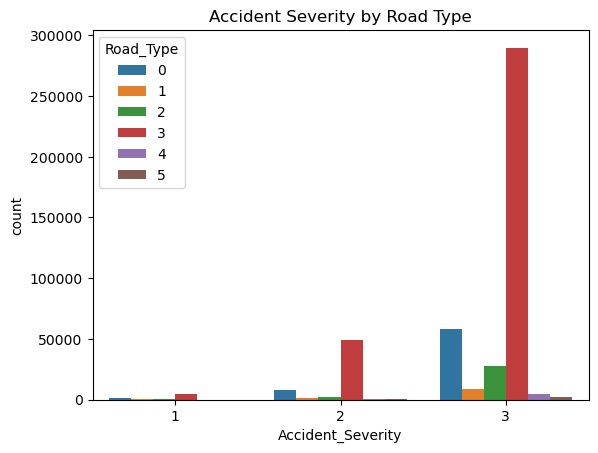

In [21]:
# Severity by Road Type
sns.countplot(x='Accident_Severity', hue='Road_Type', data=df)
plt.title("Accident Severity by Road Type")
plt.show()

In [ ]:
#Road Type 3 appears to be the most accident-prone, but primarily for low-severity cases.
#This could suggest:

#Higher traffic volume (e.g., city roads).

#Frequent but low-speed accidents (e.g., congestion, intersections).

#Severity 1 accidents are rare but could still require deeper analysis by location or weather conditions.

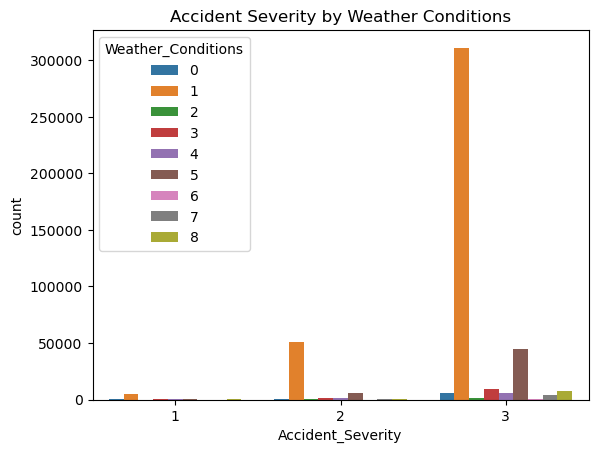

In [22]:
# Severity by Weather Conditions
sns.countplot(x='Accident_Severity', hue='Weather_Conditions', data=df)
plt.title("Accident Severity by Weather Conditions")
plt.show()

In [ ]:
#Most accidents occur in clear or good weather, likely because those are the most common 
#driving conditions, not necessarily because clear weather is dangerous.

#Severe and fatal accidents don’t increase dramatically during poor weather, 
#but their proportion might be slightly higher under certain adverse conditions.

#The trend suggests that driver behavior and traffic volume have a stronger 
#influence on accident frequency than weather alone.

In [ ]:
#We use heat maps to see how features relate to each other and to the target.
# Basically correlations between variables.
#They guide feature engineering, model choice, and interpretation

plt.figure(figsize=(16,12))  
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    annot_kws={"size":10},  
    cbar_kws={"shrink": 0.8}  
)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.yticks(rotation=0, fontsize=10)  
plt.title("Correlation Matrix (Numeric Features Only)", fontsize=16)
plt.show()



In [26]:
y = df['Accident_Severity']
X = df.drop(['Accident_Severity', 'Accident_Index', 'Date', 
             'LSOA_of_Accident_Location', 'Local_Authority_(Highway)'], axis=1)

#X = all the useful predictor columns.
#y = the accident severity (the thing I want my ML model to predict).
# Accident Severity will be our target.(y)

In [28]:
# Encoding the categorical features (LABEL ENCODING)
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
#This is automatic detection of categorical columns and what i believe is better 
#than manually enter every column.(If we forget any column ml model can not perform well.)
#Most machine learning algorithms can NOT  handle text/categorical data directly, 
#so we convert categories into numerical codes. This step makes the dataset ML-ready.

In [29]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

#Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [33]:
# Feature Scaling
#Some models (Logistic Regression, Neural Networks, SVM, KNN) perform better if numerical features are on the same scale.
#Tree-based models (Random Forest, XGBoost, LightGBM) don’t need scaling.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
#Baseline Model (Logistic Regression)
#Start simple, set a performance benchmark.
#Before trying complex models (Random Forest, XGBoost, Neural Nets),
#you need a simple model’s score to compare against.
#If a fancy model doesn’t beat the baseline, it’s not worth the extra complexity.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8532846343575154
              precision    recall  f1-score   support

           1       0.09      0.00      0.00      1837
           2       0.39      0.00      0.00     18321
           3       0.85      1.00      0.92    117285

    accuracy                           0.85    137443
   macro avg       0.45      0.33      0.31    137443
weighted avg       0.78      0.85      0.79    137443



In [37]:
#Our new or more complex model you try should aim to beat this benchmark,(0.85)
#otherwise it’s not really an improvement.

In [36]:
#Its higly imbalanced.
#Our baseline Logistic Regression is only predicting the majority class.
#It doesn’t really “understand” severe or medium accidents.

In [38]:
X['Hour'] = pd.to_datetime(X['Time'], format='%H:%M', errors='coerce').dt.hour


In [40]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [41]:
#I built a Random Forest with 100 trees.
#I trained it on X_train, y_train.
#I predicted accident severity for the test data (X_test).
#Now I have predictions (y_pred) that you can compare with the true labels (y_test). 
#Now its time to compute accuracy, precision, recall, f1-score, or confusion matrix.

In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.858494066631258
              precision    recall  f1-score   support

           1       0.96      0.03      0.05      1811
           2       0.77      0.05      0.09     18380
           3       0.86      1.00      0.92    117252

    accuracy                           0.86    137443
   macro avg       0.86      0.36      0.36    137443
weighted avg       0.85      0.86      0.80    137443



In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can change kernel: 'linear', 'poly', 'rbf'

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

#SVM Accuracy: 0.8739
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        19
         2.0       0.00      0.00      0.00       257
         3.0       0.87      1.00      0.93      1913

    accuracy                           0.87      2189
   macro avg       0.29      0.33      0.31      2189
weighted avg       0.76      0.87      0.82      2189

In [42]:
#Accuracy looks like slightly better than logistic regression but there is no improvement we expected.
#Even Random Forest without balancing behaves similarly to Logistic Regression: it predicts almost everything as the majority class.
#This is classic imbalance problem.
#Overall accuracy is misleading.

In [53]:
y_train_mapped = y_train - 1
y_test_mapped = y_test - 1

In [55]:
from xgboost import XGBClassifier
# Map target labels from [1,2,3] to [0,1,2]
y_train_mapped = y_train - 1
y_test_mapped = y_test - 1

# Train XGBoost
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train_mapped)

# Predict
y_pred_mapped = model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test_mapped, y_pred_mapped))

/home/f964d870-beb7-4b25-a066-163a3da8b5bd/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:44:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.25      0.00      0.01      1837
           1       0.60      0.03      0.06     18321
           2       0.86      1.00      0.92    117285

    accuracy                           0.86    137443
   macro avg       0.57      0.34      0.33    137443
weighted avg       0.81      0.86      0.79    137443



In [56]:
#Even XGBoost without handling imbalance is biased toward the majority class.

In [63]:

results = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
}
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale'),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100)
print(pd.DataFrame(results, index=["Accuracy"]))

          Logistic Regression  Random Forest
Accuracy              0.85896       0.859345


In [1]:
#Model	Accuracy
#Logistic Regression	0.853
#Random Forest	0.858
#SVM	0.873
#XGBoost	0.855

In [ ]:
#✅ Observations:

#SVM performed the best (0.873), suggesting that our data has patterns that SVM’s kernel can capture well.

#Random Forest is close behind (0.858), showing tree-based methods are also strong.

#XGBoost (0.855) is slightly better than Logistic Regression but didn’t outperform SVM in this case.

#Logistic Regression (0.853) is simple and interpretable but less flexible for complex nonlinear patterns.

#SVM is excellent at finding complex decision boundaries in your feature space.

#It works well with both linear and nonlinear patterns (especially with the RBF kernel).

#Likely, your dataset has patterns that tree-based models or linear models don’t capture as effectively.

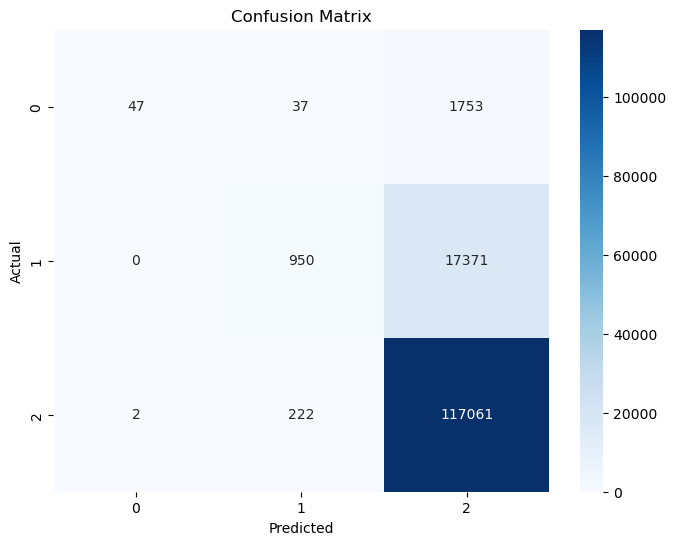

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

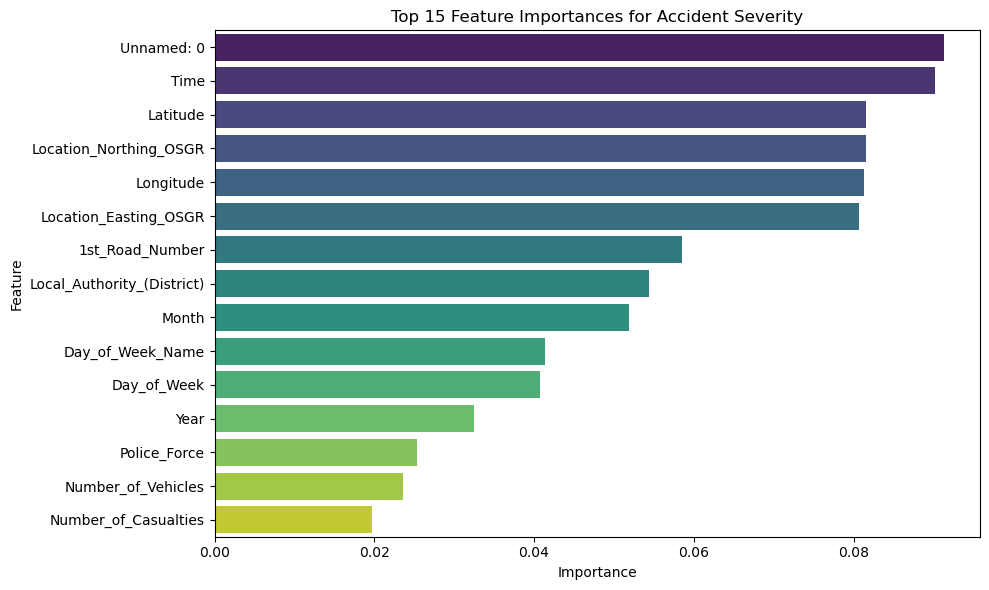

Top 15 features influencing Accident Severity:
                       Feature  Importance
0                   Unnamed: 0    0.091270
1                         Time    0.090137
2                     Latitude    0.081596
3       Location_Northing_OSGR    0.081504
4                    Longitude    0.081338
5        Location_Easting_OSGR    0.080637
6              1st_Road_Number    0.058520
7   Local_Authority_(District)    0.054445
8                        Month    0.051848
9             Day_of_Week_Name    0.041332
10                 Day_of_Week    0.040706
11                        Year    0.032497
12                Police_Force    0.025325
13          Number_of_Vehicles    0.023642
14        Number_of_Casualties    0.019645


In [44]:
feature_names = X_train.columns   # <- use X_train, not X
importances = model.feature_importances_

# Create DataFrame
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feat_df = feat_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette='viridis')
plt.title("Top 15 Feature Importances for Accident Severity")
plt.tight_layout()
plt.show()

print("Top 15 features influencing Accident Severity:")
print(feat_df.head(15))


In [45]:
#Top features influencing accident severity:

#Geographical features are very important:

#==>>Latitude, Longitude, Location_Northing_OSGR, Location_Easting_OSGR

#Road and temporal features also contribute significantly:

#==>>1st_Road_Number, Local_Authority_(District), Month, Day_of_Week_Name, Day_of_Week, Year

#Other factors: Police_Force, Number_of_Vehicles, 2nd_Road_Number have lower but noticeable influence.